In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CustomerSegmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
for col in df.columns:
    temp= df[col].isnull().sum()
    if temp>0:
        print(f' Column {col} contains {temp} null values.')


 Column Income contains 24 null values.


df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isnull().sum()

In [12]:
##To classify columns in a DataFrame based on their data types.
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)

['Education', 'Marital_Status', 'Dt_Customer']
['Income']


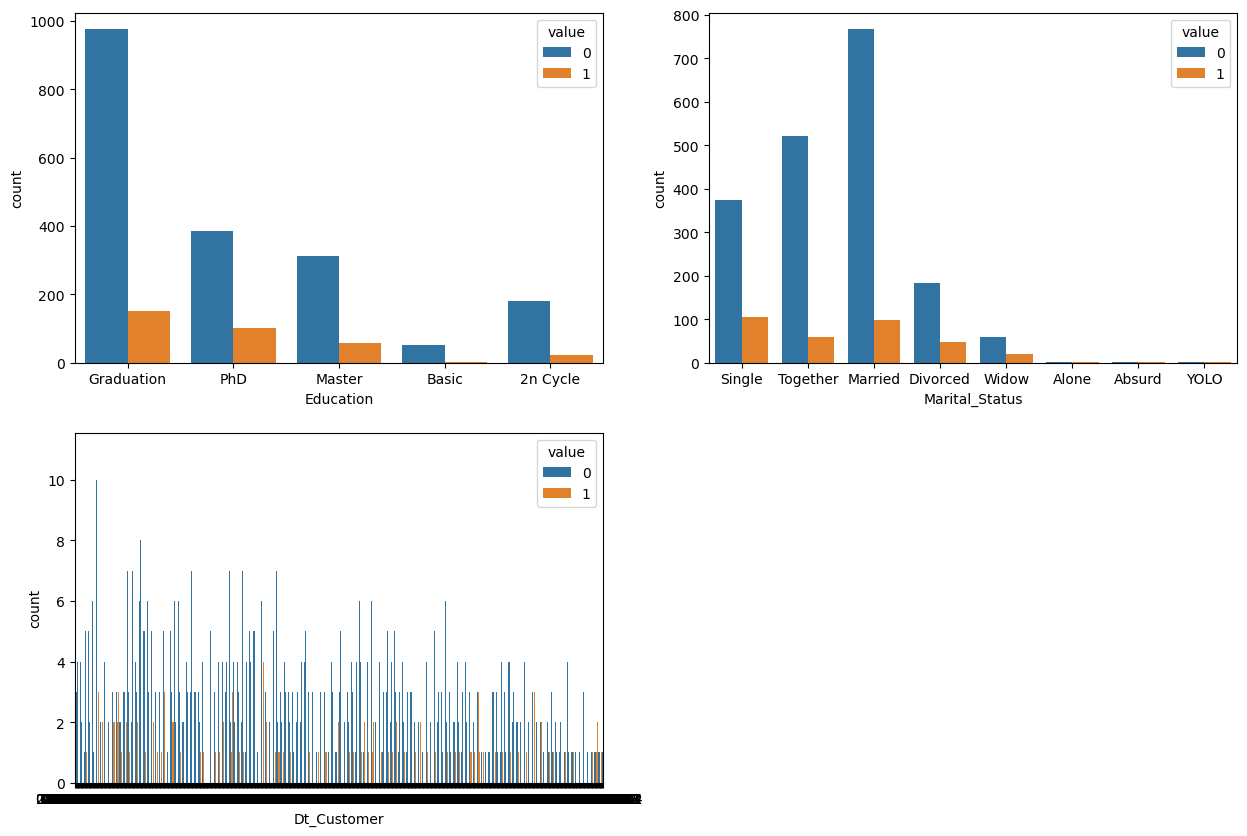

In [13]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    # Use melt to transform the data to long form 
    df_melted = df.melt(id_vars=[col], value_vars=['Response'], var_name='hue')
    sb.countplot(x=col, hue='value', data=df_melted)
plt.show()

In [14]:
#Feature Engineering: Create a total spend column
df['Total_Spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                       df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [15]:
#Feature Selection for Clustering
selected_features = ["Income", "Recency", "Total_Spend", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]


In [16]:
features = df[selected_features]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

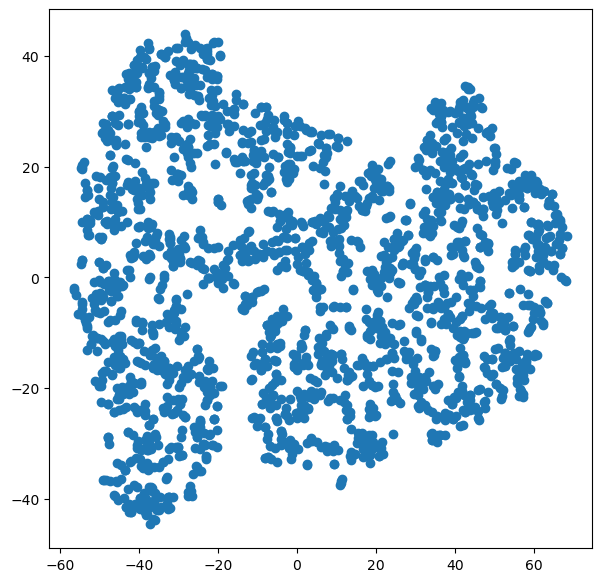

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(scaled_features)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


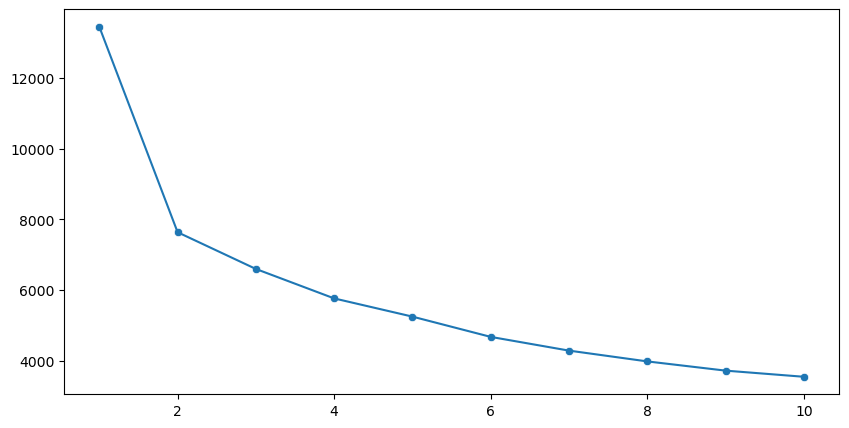

In [20]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(1, 11), y=wcss)
sb.scatterplot(x=range(1, 11), y=wcss)
plt.show()

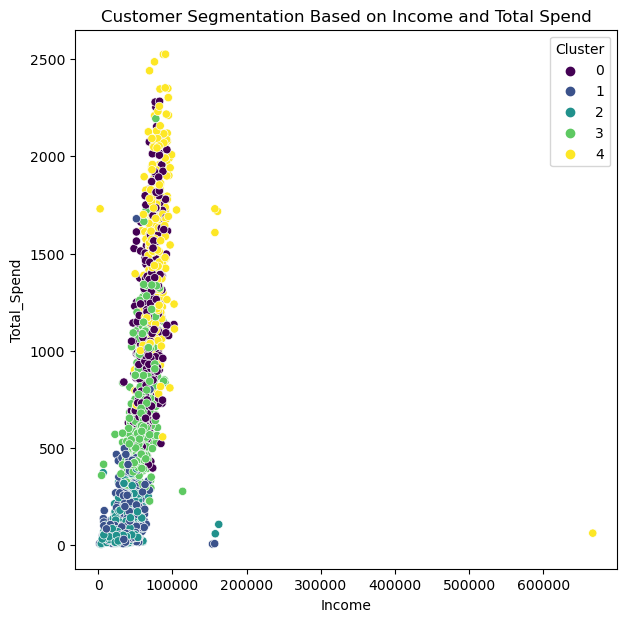

In [32]:
# Choose the number of clusters based on the Elbow Method
optimal_clusters = 5  # Set based on elbow method observation

# Train the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Attach the cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Visualize the clusters with Income vs Total Spend
plt.figure(figsize=(7,7))
sb.scatterplot(data=df, x='Income', y='Total_Spend', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Based on Income and Total Spend')
plt.show()



In [27]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
               Income    Recency  Total_Spend  NumWebPurchases  \
Cluster                                                          
0        68330.529056  74.922518  1122.607748         5.762712   
1        37473.913479  75.907104   137.074681         2.488160   
2        34123.004496  25.512590    91.852518         1.985612   
3        59053.136919  28.709046   718.212714         6.787286   
4        80173.337061  36.619808  1512.070288         4.869010   

         NumCatalogPurchases  NumStorePurchases  
Cluster                                          
0                   4.399516           9.150121  
1                   0.723133           3.497268  
2                   0.517986           3.158273  
3                   2.733496           7.422983  
4                   7.485623           7.920128  


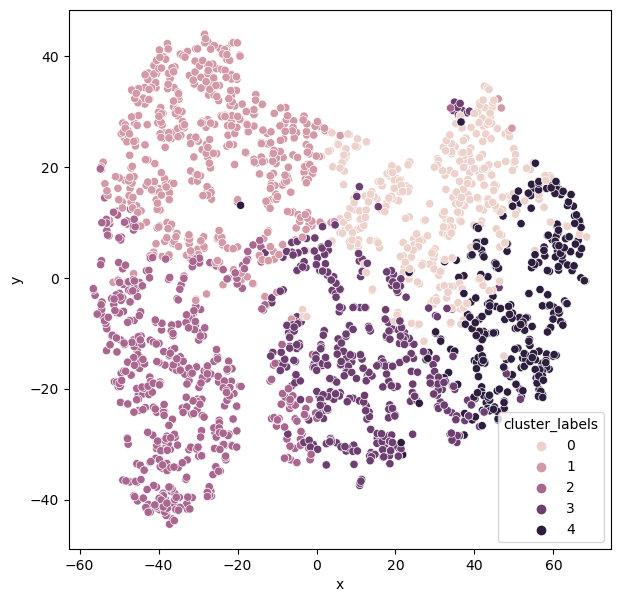

In [30]:
plt.figure(figsize=(7, 7))
# Create a DataFrame with the tsne_data and segments
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'cluster_labels': cluster_labels})
# Use the DataFrame in the scatterplot function
sb.scatterplot(x='x', y='y', hue='cluster_labels', data=df_tsne)
plt.show()

# This code is modified by Susobhan Akhuli


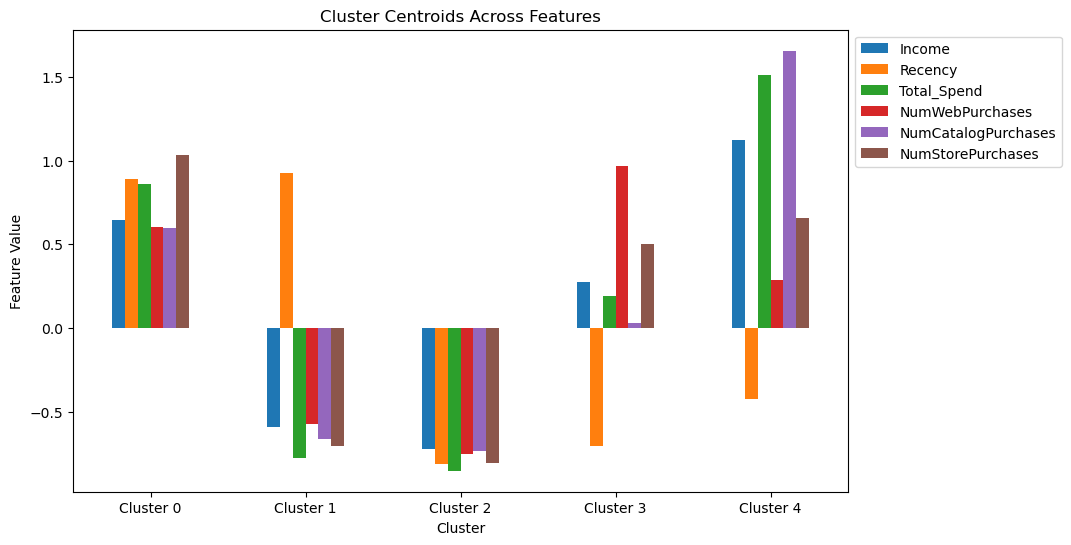

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your kmeans model and data
# KMeans model has been fitted as `kmeans`
centroids = kmeans.cluster_centers_

# Assign the selected feature names
selected_features = ["Income", "Recency", "Total_Spend", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

# Create a DataFrame to visualize the cluster centroids
centroid_df = pd.DataFrame(centroids, columns=selected_features)

# Plotting the centroids for each feature
centroid_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centroids Across Features')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(ticks=range(len(centroids)), labels=[f'Cluster {i}' for i in range(len(centroids))], rotation=0)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


Average Silhouette Score: 0.256


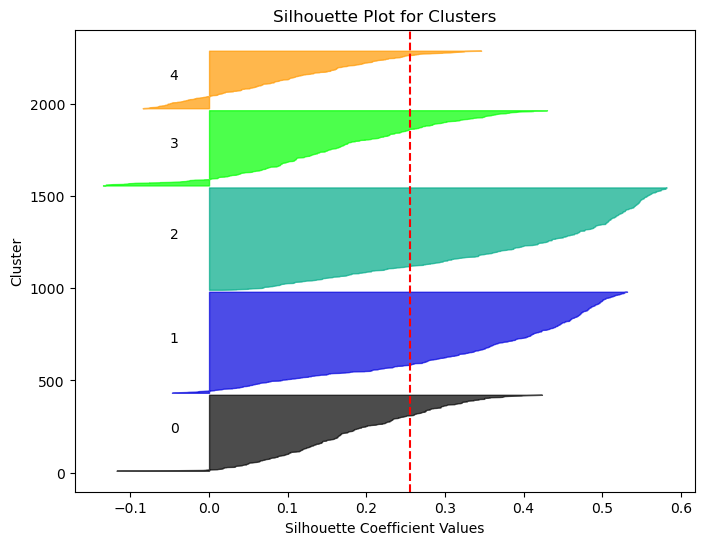

In [35]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Assuming `X_scaled` is your normalized feature set and `kmeans_labels` contains cluster labels
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg:.3f}")

# Compute Silhouette Values for Each Sample
silhouette_values = silhouette_samples(scaled_features, cluster_labels)

# Plot Silhouette Values for Visualization
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(optimal_clusters ):
    cluster_values = silhouette_values[cluster_labels == i]
    cluster_values.sort()
    size_cluster_i = cluster_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_clusters )
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")

plt.show()
